In [ ]:
import pandas as pd
import numpy as np
import os, glob
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import random
import matplotlib.gridspec as gridspec

In [ ]:
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [ ]:
path = "D:/shin/data/welfare/"
fig_path = 'D:/shin/최종 소스코드 및 데이터/fig/'
file = os.listdir(path)
# data = pd.read_csv(path + '근로형태별_근로자현황_merge.csv', header=[0,1])

In [ ]:
file

['보육비지원_제도_사용_현황.csv',
 '산업별 성별 취업 현황2.jpg',
 '생리휴가_사용_현황.csv',
 '선택적복리후생_제도_사용_현황.csv',
 '선택적복리후생_제도_사용_현황_20220125161351.csv',
 '출산 전후 산업별 급여 추이(2016~2020).png',
 '출산 전후 산업별 급여 추이(2016~2020,원).png',
 '출산 전후 산업별 급여 추이(2016~2021).jpg',
 '출산 전후 산업별 급여 추이.jpg',
 '출산전후휴가급여_산업별.csv',
 '출산전후휴가급여_산업별2.csv',
 '출산휴가_사용_현황.csv']

In [ ]:
welfare_data = pd.read_csv(path+'/선택적복리후생_제도_사용_현황.csv', encoding='cp949', header=[0,1,2])
period_data= pd.read_csv(path+'/생리휴가_사용_현황.csv', encoding='cp949', header=[0,1,2])
childcare_data= pd.read_csv(path+'/보육비지원_제도_사용_현황.csv', encoding='cp949', header=[0,1,2])
ml_data = pd.read_csv(path+'/출산휴가_사용_현황.csv', encoding='cp949', header=[0,1,2])

In [ ]:
welfare_data.head()

구분별(1)      구분별(2)  2012                                                    \
  구분별(1)      구분별(2)  제도유무             쉽게 사용할 수 있다            전년도 사용여부         
  구분별(1)      구분별(2)    있음    없음    모름           예   아니오  무응답       사용   비사용   
0     전체          소계  42.2  27.0  30.7        86.3  12.2  1.4     54.0  45.6   
1     규모    100∼299인  25.3  39.4  35.3        96.4   3.6  0.0     63.0  37.0   
2     규모    300∼999인  28.0  34.7  37.3        78.2  21.8  0.0     50.6  49.4   
3     규모  1000∼1999인  53.5  25.0  21.5        92.3   7.6  0.1     56.9  43.1   
4     규모    2000인 이상  59.6  14.5  25.8        84.9  12.5  2.6     51.9  47.3   

   ...        2016                 2018                                \
   ... 쉽게 사용할 수 있다 전년도 사용여부        제도유무             쉽게 사용할 수 있다         
   ...         아니오       사용   비사용    있음    없음    모름           예   아니오   
0  ...        11.6     47.4  52.6  43.7  22.9  33.3        88.1  11.9   
1  ...         8.1     57.2  42.8  23.5  37.1  39.3        91.5   8.5   
2  ...        20.9     35.5  64.5  29.9  33.8  36.3        90.5   9.5   
3  ...        10.1     60.5  39.5  47.8  18.8  33.4        92.0   8.0   
4  ...        10.0     46.0  54.0  56.8  13.6  29.6        86.2  13.8   

                  
  전년도 사용여부        
        사용   비사용  
0     44.3  55.7  
1     53.7  46.3  
2     46.7  53.3  
3     47.5  52.5  
4     41.6  58.4  

[5 rows x 32 columns]

### 현황 비율 함수(Function)와 시각화 함수(Function)

In [ ]:
def data(data, col1, col2):
    ratio = data[col1, col2].iloc[0].values
    ratio = ratio.ravel()

    labels = data[col1, col2].columns.tolist()
        
    return ratio, labels, col2

In [ ]:
def label_visualization(vi_title, existence_ratio, easily_ratio, prevuse_ratio, existence_labels, easily_labels, prevuse_labels, existence_title, easily_title, prevuse_title):
    plt.figure(figsize=(22, 22))
    plt.rcParams["font.size"] = 13
    color = ['lightcoral', 'lightskyblue', '#d395d0']
    
    gs = gridspec.GridSpec(1,3)

    explode_1 = [0.05, 0.05, 0.05]

    plt.subplot(gs[0])
    plt.pie(existence_ratio, labels = existence_labels, autopct = '%.1f%%', explode=explode_1, colors = color, shadow=True)
    plt.title('[제도 유무]', size = 15)
    plt.legend(loc = (1, 0.5))

    explode_2 = [0.05, 0.05]

    plt.subplot(gs[1])
    plt.pie(easily_ratio, labels = easily_labels, autopct = '%.1f%%', explode=explode_2, colors = color, shadow=True)
    plt.title('[쉽게 사용할 수 있는가?]', size = 15)
    plt.legend(loc = (1, 0.5))

    explode_3 = [0.035, 0.035]

    plt.subplot(gs[2])
    plt.pie(prevuse_ratio, labels = prevuse_labels, autopct = '%.1f%%', explode=explode_3, colors = color, shadow=True)
    plt.title('[전년도 사용 여부]', size = 15)
    plt.legend(loc = (1, 0.5))
    
    plt.savefig(fig_path + vi_title +'.png')

## 선택적 복리후생 제도 사용 현황

In [ ]:
existence_ratio, existence_labels, existence_title = data(welfare_data, '2018', '제도유무')
easily_ratio, easily_labels, easily_title = data(welfare_data, '2018', '쉽게 사용할 수 있다')
prevuse_ratio, prevuse_labels, prevuse_title = data(welfare_data, '2018','전년도 사용여부')

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2947: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


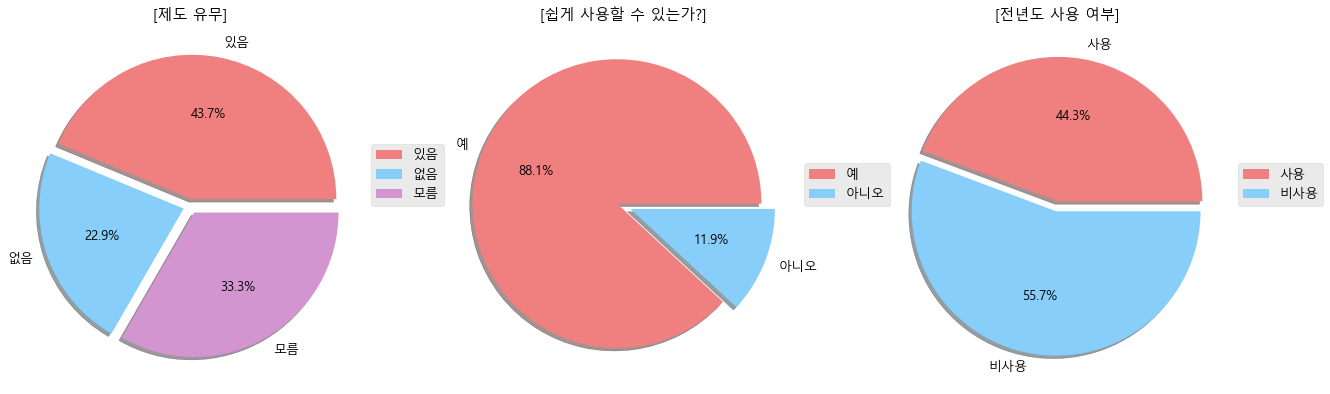

In [ ]:
label_visualization('선택적 복리후생 제도 사용 현황', existence_ratio, easily_ratio, prevuse_ratio, existence_labels, easily_labels, prevuse_labels, existence_title, easily_title, prevuse_title)

## 보육비지원 제도 사용 현황

In [ ]:
existence_ratio, existence_labels, existence_title = data(childcare_data, '2018', '제도유무')
easily_ratio, easily_labels, easily_title = data(childcare_data, '2018', '쉽게 사용할 수 있다')
prevuse_ratio, prevuse_labels, prevuse_title = data(childcare_data, '2018','전년도 사용여부')

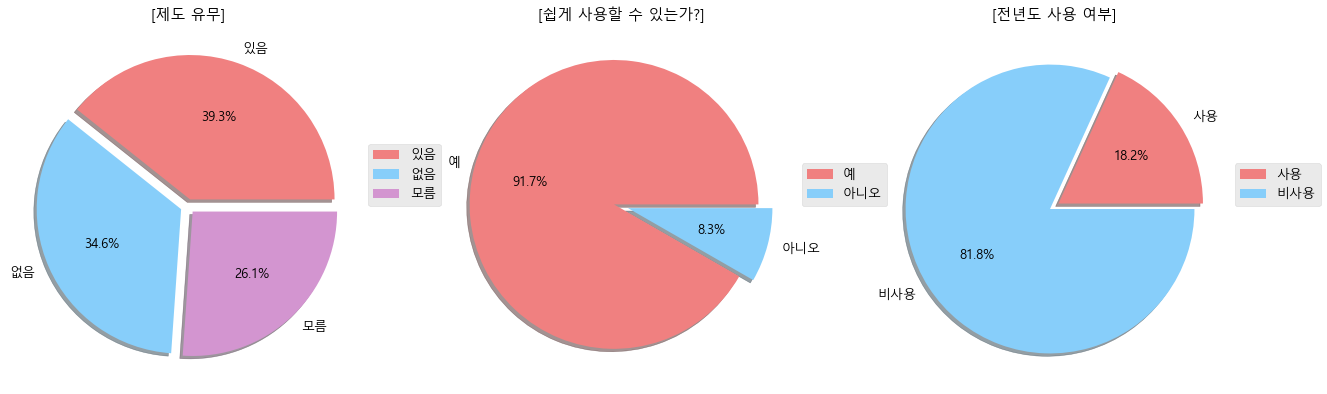

In [ ]:
label_visualization('보육비지원 제도 사용 현황', existence_ratio, easily_ratio, prevuse_ratio, existence_labels, easily_labels, prevuse_labels, existence_title, easily_title, prevuse_title)

## 출산휴가 사용 현황

In [ ]:
existence_ratio, existence_labels, existence_title = data(ml_data, '2018', '제도유무')
easily_ratio, easily_labels, easily_title = data(ml_data, '2018', '쉽게 사용할 수 있다')
prevuse_ratio, prevuse_labels, prevuse_title = data(ml_data, '2018','전년도 사용여부')

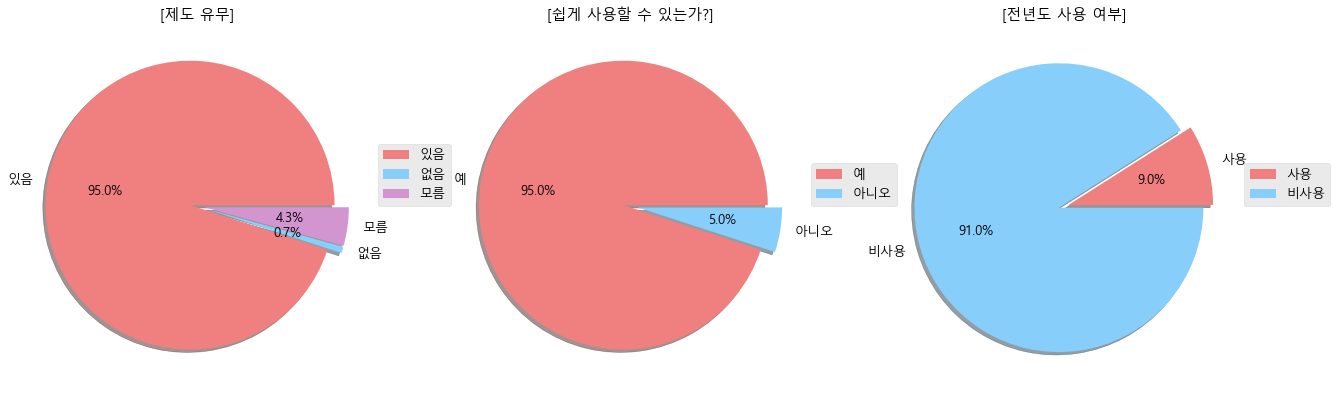

In [ ]:
label_visualization('출산휴가 사용 현황', existence_ratio, easily_ratio, prevuse_ratio, existence_labels, easily_labels, prevuse_labels, existence_title, easily_title, prevuse_title)

## 생리휴가 사용 현황

In [ ]:
existence_ratio, existence_labels, existence_title = data(period_data, '2018', '제도유무')
easily_ratio, easily_labels, easily_title = data(period_data, '2018', '쉽게 사용할 수 있다')
prevuse_ratio, prevuse_labels, prevuse_title = data(period_data, '2018','전년도 사용여부')

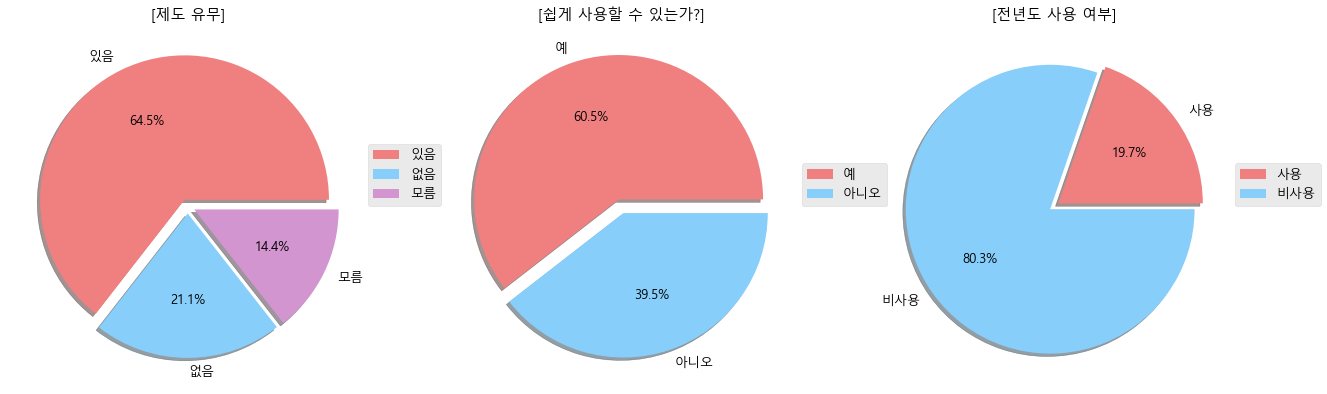

In [ ]:
label_visualization('생리휴가 사용 현황', existence_ratio, easily_ratio, prevuse_ratio, existence_labels, easily_labels, prevuse_labels, existence_title, easily_title, prevuse_title)